# PANDAS METHODS - GROUPBY
The groupby method in pandas is a powerful tool that allows you to split a DataFrame into groups based on some criteria

<img src="https://raw.githubusercontent.com/enzoschitini/repository/main/image/Frame%209951.png" alt="capa">

---

# **Appunti** • Impariamo a ottenere belle metriche dal Groupby
#### [Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

- Importiamo i dati e i risorse

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/enzoschitini/Adige/main/Italia/Lezioni.csv')
df = df.drop(columns='Unnamed: 0', axis=1)
df.head()

,Index,Data,Ora,Professoressa,Livello,Lezione,Giorno della settimana,Mese,Anno
0,1,2023-05-22,8,Virginia,B1,B132,Lunedì,Maggio,2023
1,2,2023-05-22,11,Graziana,B1,B135,Lunedì,Maggio,2023
2,3,2023-05-23,10,Francesca,C1,C123,Martedì,Maggio,2023
3,4,2023-05-23,11,Sara,B1,B143,Martedì,Maggio,2023
4,5,2023-05-24,10,Alice,B1,B141,Mercoledì,Maggio,2023


# Analizziamo la quantità di lezioni fatte al mese

- Qui possiamo semplicemente prelevare i mesi ed i loro valori

In [21]:
(df.groupby('Mese')['Index'].count() / df['Index'].count() * 100).round()

Mese
Agosto       16.0
Dicembre      5.0
Febbraio      2.0
Gennaio       6.0
Giugno       16.0
Luglio       12.0
Maggio        8.0
Novembre      9.0
Ottobre      15.0
Settembre    12.0
Name: Index, dtype: float64

### Per analisi megliori
Li dobbiamo trasformare i una struttura di dati diversa

- In Tupla

In [22]:
# Esegui il groupby
risultato = (df.groupby('Mese')['Index'].count() / df['Index'].count() * 100).round()

# Trasforma il risultato in una lista di tuple
lista_tuple = list(risultato.reset_index().itertuples(index=False, name=None))
lista_tuple

[('Agosto', 16.0),
 ('Dicembre', 5.0),
 ('Febbraio', 2.0),
 ('Gennaio', 6.0),
 ('Giugno', 16.0),
 ('Luglio', 12.0),
 ('Maggio', 8.0),
 ('Novembre', 9.0),
 ('Ottobre', 15.0),
 ('Settembre', 12.0)]

- In dizionario

In [23]:
# Esegui il groupby
risultato = (df.groupby('Mese')['Index'].count() / df['Index'].count() * 100).round()

# Trasforma il risultato in un dizionario
dizionario = risultato.to_dict()
dizionario

{'Agosto': 16.0,
 'Dicembre': 5.0,
 'Febbraio': 2.0,
 'Gennaio': 6.0,
 'Giugno': 16.0,
 'Luglio': 12.0,
 'Maggio': 8.0,
 'Novembre': 9.0,
 'Ottobre': 15.0,
 'Settembre': 12.0}

- Così li possiamo mettere in ordine

In [24]:
# Dizionario da ordinare
data = {'Agosto': 16.0, 'Dicembre': 5.0, 'Febbraio': 2.0, 'Gennaio': 6.0, 'Giugno': 16.0,
        'Luglio': 12.0, 'Maggio': 8.0, 'Novembre': 9.0, 'Ottobre': 15.0, 'Settembre': 12.0}

# Definire l'ordine dei mesi dell'anno
months_order = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre', 'Gennaio', 'Febbraio', 'Marzo', 'Aprile']

# Ordinare il dizionario in base all'ordine dei mesi dell'anno
sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: months_order.index(item[0]))}

print(sorted_data)


{'Maggio': 8.0, 'Giugno': 16.0, 'Luglio': 12.0, 'Agosto': 16.0, 'Settembre': 12.0, 'Ottobre': 15.0, 'Novembre': 9.0, 'Dicembre': 5.0, 'Gennaio': 6.0, 'Febbraio': 2.0}


### Ora creare anche dei grafici

C:\Users\Soldado\AppData\Local\Temp\ipykernel_24228\1031386987.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Soldado\AppData\Local\Temp\ipykernel_24228\1031386987.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='Mese'>

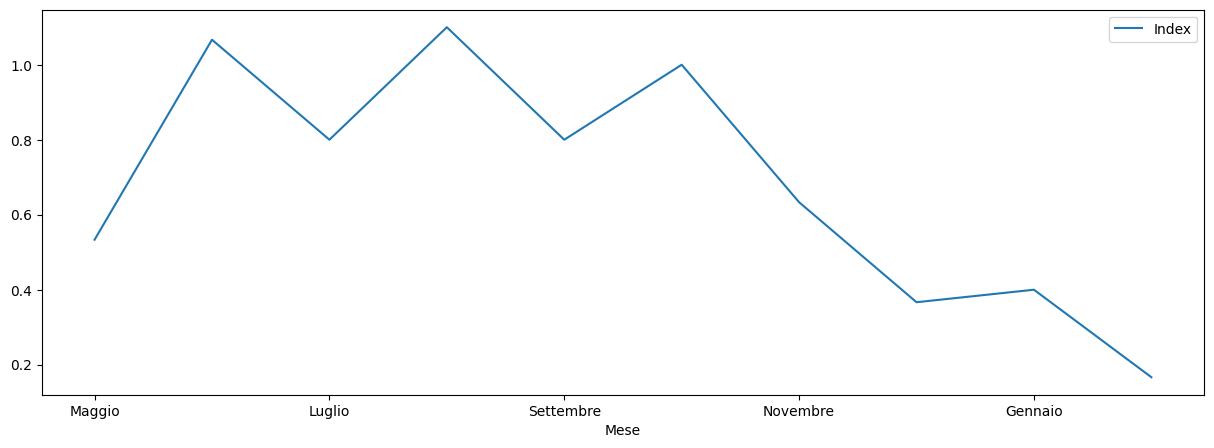

In [25]:
months_order = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre',
       'Novembre', 'Dicembre', 'Gennaio', 'Febbraio']

valore = 'Mese'
df_mese = df[['Index', valore]]

def media(giorno):
    giorno = (giorno / 30) #* 100
    return giorno

df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
df_mese.sort_values(valore).groupby(valore).count().apply(media).plot(figsize=[15,5])

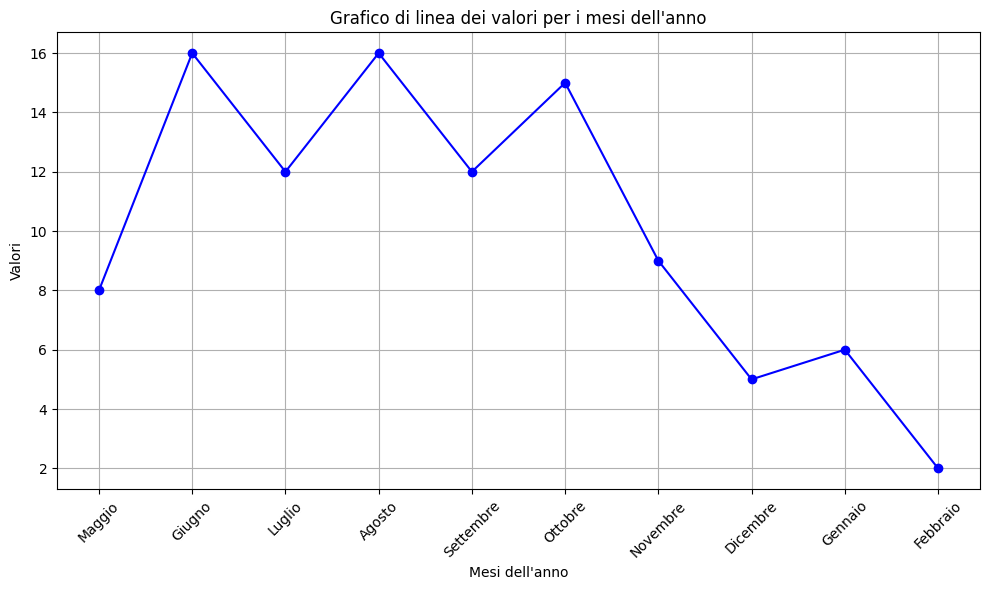

In [27]:
# Dizionario con i dati
#data = {'Gennaio': 6.0, 'Febbraio': 2.0, 'Maggio': 8.0, 'Giugno': 16.0, 'Luglio': 12.0,
        #'Agosto': 16.0, 'Settembre': 12.0, 'Ottobre': 15.0, 'Novembre': 9.0, 'Dicembre': 5.0}
data = sorted_data

# Estrai i mesi e i valori dal dizionario
months = list(data.keys())
values = list(data.values())

# Crea il grafico di linea
plt.figure(figsize=(10, 6))
plt.plot(months, values, marker='o', color='b', linestyle='-')

# Aggiungi etichette e titoli
plt.xlabel('Mesi dell\'anno')
plt.ylabel('Valori')
plt.title('Grafico di linea dei valori per i mesi dell\'anno')

# Mostra il grafico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



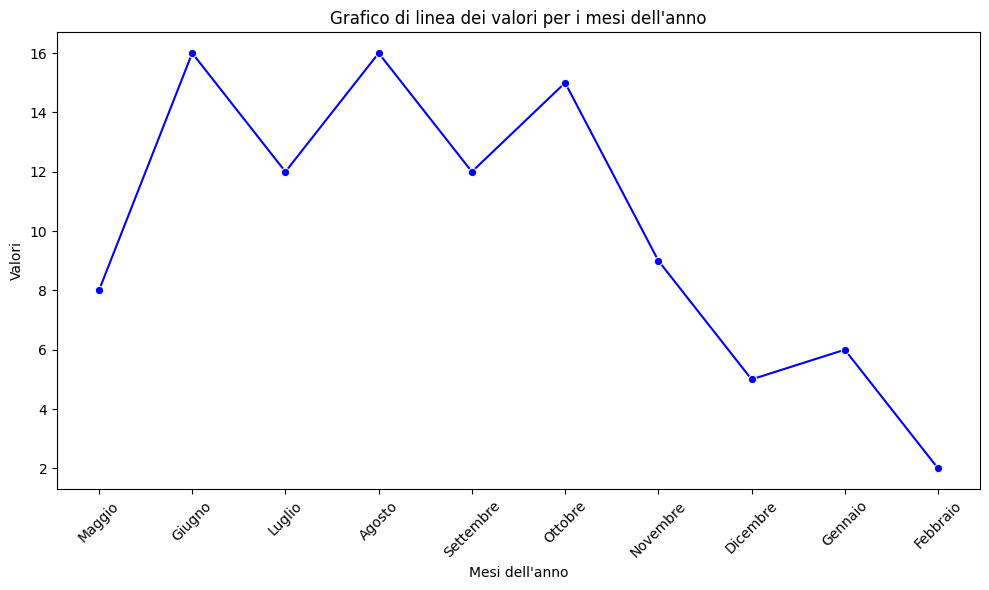

In [28]:
# Dizionario con i dati
#data = {'Gennaio': 6.0, 'Febbraio': 2.0, 'Maggio': 8.0, 'Giugno': 16.0, 'Luglio': 12.0,
        #'Agosto': 16.0, 'Settembre': 12.0, 'Ottobre': 15.0, 'Novembre': 9.0, 'Dicembre': 5.0}
data = sorted_data

# Creare un DataFrame da un dizionario
df = pd.DataFrame(list(data.items()), columns=['Mese', 'Valore'])

# Creare il grafico di linea con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Mese', y='Valore', data=df, marker='o', color='b')

# Aggiungere etichette e titoli
plt.xlabel('Mesi dell\'anno')
plt.ylabel('Valori')
plt.title('Grafico di linea dei valori per i mesi dell\'anno')

# Mostrare il grafico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
# Dizionario con i dati
#data = {'Gennaio': 6.0, 'Febbraio': 2.0, 'Maggio': 8.0, 'Giugno': 16.0, 'Luglio': 12.0,
        #'Agosto': 16.0, 'Settembre': 12.0, 'Ottobre': 15.0, 'Novembre': 9.0, 'Dicembre': 5.0}
data = sorted_data

# Estrai i mesi e i valori dal dizionario
months = list(data.keys())
values = list(data.values())

# Crea il grafico di linea con Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=months, y=values, mode='lines+markers', marker=dict(color='blue')))

# Aggiungi etichette e titoli
fig.update_layout(title='Grafico di linea dei valori per i mesi dell\'anno',
                  xaxis_title='Mesi dell\'anno',
                  yaxis_title='Valori')

# Mostra il grafico
fig.show()


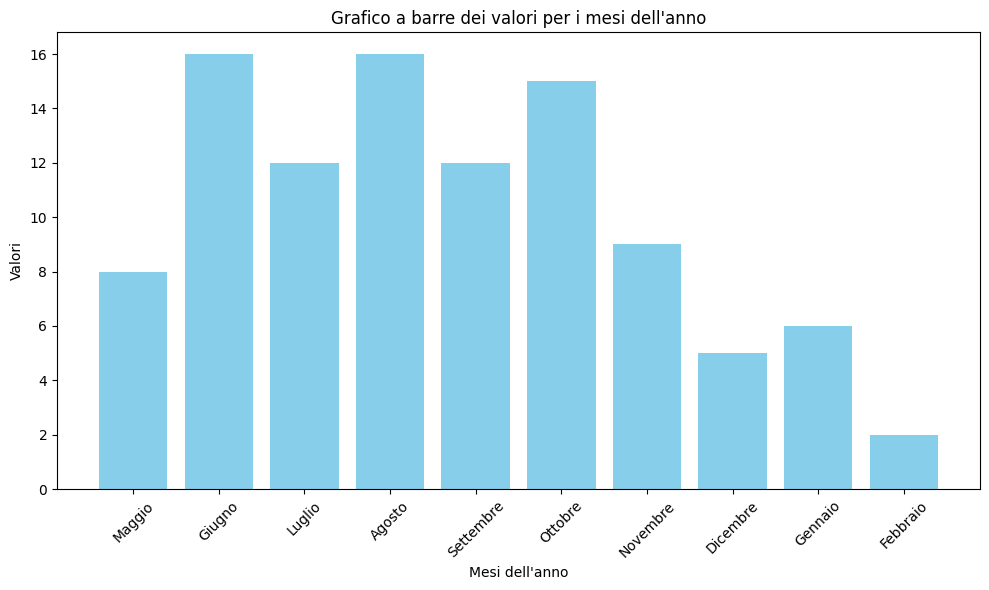

In [30]:
# Dizionario con i dati
#data = {'Gennaio': 6.0, 'Febbraio': 2.0, 'Maggio': 8.0, 'Giugno': 16.0, 'Luglio': 12.0,
        #'Agosto': 16.0, 'Settembre': 12.0, 'Ottobre': 15.0, 'Novembre': 9.0, 'Dicembre': 5.0}
data = sorted_data

# Estrai i mesi e i valori dal dizionario
months = list(data.keys())
values = list(data.values())

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(months, values, color='skyblue')

# Aggiungi etichette e titoli
plt.xlabel('Mesi dell\'anno')
plt.ylabel('Valori')
plt.title('Grafico a barre dei valori per i mesi dell\'anno')

# Mostra il grafico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



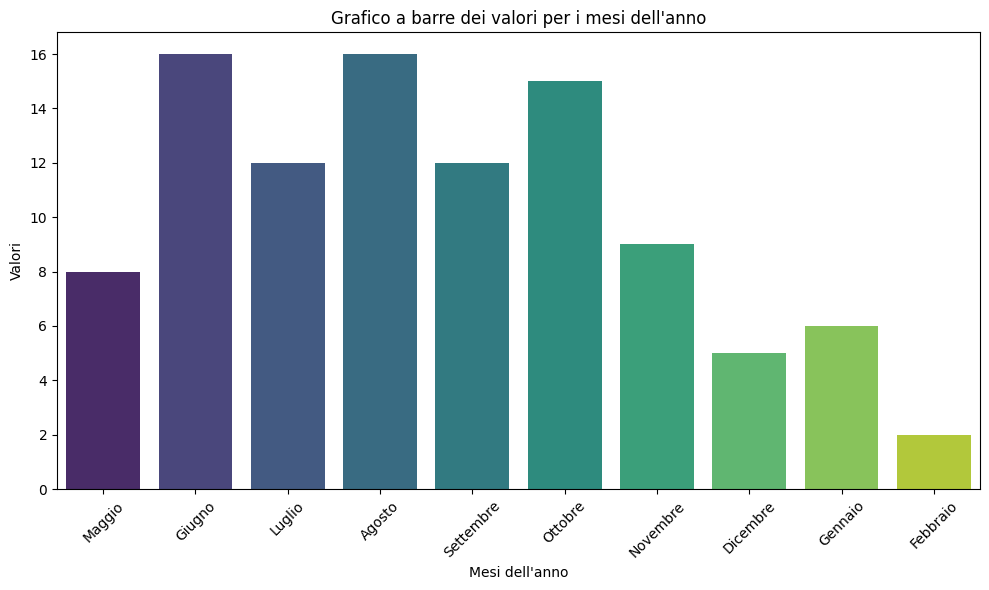

In [31]:
# Dizionario con i dati
#data = {'Gennaio': 6.0, 'Febbraio': 2.0, 'Maggio': 8.0, 'Giugno': 16.0, 'Luglio': 12.0,
        #'Agosto': 16.0, 'Settembre': 12.0, 'Ottobre': 15.0, 'Novembre': 9.0, 'Dicembre': 5.0}
data = sorted_data

# Creare un DataFrame da un dizionario
df = pd.DataFrame(list(data.items()), columns=['Mese', 'Valore'])

# Creare il grafico a barre con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Mese', y='Valore', data=df, palette='viridis')

# Aggiungere etichette e titoli
plt.xlabel('Mesi dell\'anno')
plt.ylabel('Valori')
plt.title('Grafico a barre dei valori per i mesi dell\'anno')

# Mostrare il grafico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
# Dizionario con i dati
#data = {'Gennaio': 6.0, 'Febbraio': 2.0, 'Maggio': 8.0, 'Giugno': 16.0, 'Luglio': 12.0,
        #'Agosto': 16.0, 'Settembre': 12.0, 'Ottobre': 15.0, 'Novembre': 9.0, 'Dicembre': 5.0}
data = sorted_data

# Estrai i mesi e i valori dal dizionario
months = list(data.keys())
values = list(data.values())

# Crea il grafico a barre con Plotly
fig = go.Figure(data=[go.Bar(x=months, y=values, marker_color='skyblue')])

# Aggiungi etichette e titoli
fig.update_layout(title='Grafico a barre dei valori per i mesi dell\'anno',
                  xaxis_title='Mesi dell\'anno',
                  yaxis_title='Valori')

# Mostra il grafico
fig.show()


In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/enzoschitini/Adige/main/Italia/Lezioni.csv')
df = df.drop(columns='Unnamed: 0', axis=1)
df.head()

,Index,Data,Ora,Professoressa,Livello,Lezione,Giorno della settimana,Mese,Anno
0,1,2023-05-22,8,Virginia,B1,B132,Lunedì,Maggio,2023
1,2,2023-05-22,11,Graziana,B1,B135,Lunedì,Maggio,2023
2,3,2023-05-23,10,Francesca,C1,C123,Martedì,Maggio,2023
3,4,2023-05-23,11,Sara,B1,B143,Martedì,Maggio,2023
4,5,2023-05-24,10,Alice,B1,B141,Mercoledì,Maggio,2023


In [34]:
B1 = df[df['Livello'] == 'B1']
B1 = (B1.groupby('Mese')['Index'].count()).round()
B1 = B1.to_dict()

B2 = df[df['Livello'] == 'B2']
B2 = (B2.groupby('Mese')['Index'].count()).round()
B2 = B2.to_dict()

C1 = df[df['Livello'] == 'C1']
C1 = (C1.groupby('Mese')['Index'].count()).round()
C1 = C1.to_dict()

In [35]:
# Dati per le due linee
x = list(data.keys())
y1 = list(C1.values())
y2 = list(B2.values())
y3 = list(B1.values())

# Creare il grafico di linea con due linee
fig = go.Figure()

# Aggiungere la prima linea con colore blu
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='C1', line=dict(color='lightseagreen')))

# Aggiungere la seconda linea con colore rosso
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='B2', line=dict(color='lightskyblue')))

# Aggiungere la terza linea con colore verde
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name='B1', line=dict(color='red')))

# Aggiungere etichette e titoli
fig.update_layout(title='Grafico dei livelli',
                  xaxis_title='Mesi',
                  yaxis_title='Valori')

# Mostrare il grafico
fig.show()

---